# Linear Regression with Gradient Descent
Here, we import the libraries needed: NumPy for numerical operations, pandas for data handling, and Matplotlib for plotting.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Generate Linear-Looking Data
This code generates a dataset that follows a linear trend. X is your feature (independent variable) and y is the target (dependent variable).

The linear relationship is defined by:

```math
y = 4 + 3X + noise
```
where noise is random normal noise added to introduce variability, as in real-world data.

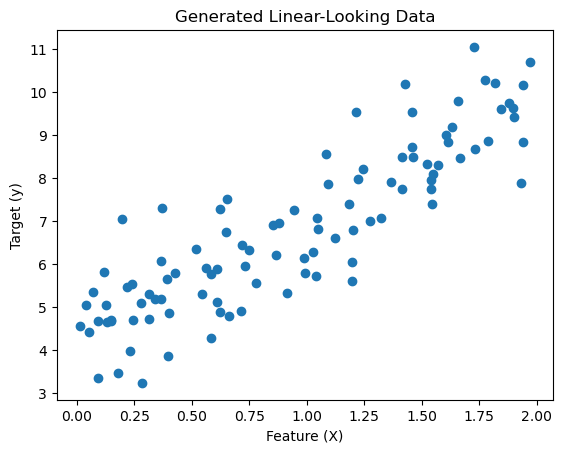

In [13]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Generated Linear-Looking Data')
plt.show()

## 2. Initialize Parameters and Define Functions

In [23]:
w = np.random.randn()
b = np.random.randn()
print(f'w = {w}')
print(f'b = {b}')

w = -0.846793718068405
b = -1.5148472246858646


In [17]:
def compute_mse(X, y, w, b):
    num_samples = len(X)
    y_pred = w * X + b
    mse = (1 / num_samples) * np.sum((y_pred - y) ** 2)
    return mse


def gradient_descent(X, y, w, b, learning_rate, iterations):
    num_samples = len(X)
    history = []

    for i in range(iterations):
        y_pred = w * X + b
        dw = (2 / num_samples) * np.sum((y_pred - y) * X)
        db = (2 / num_samples) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        mse = compute_mse(X, y, w, b)
        history.append(mse)

    return w, b, history


## 3. Visualize Initial Poor Fit

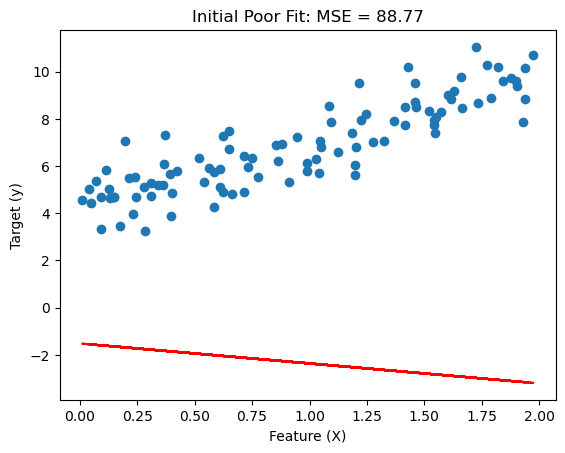

In [24]:
initial_mse = compute_mse(X, y, w, b)

plt.scatter(X, y)
plt.plot(X, w * X + b, color='red')
plt.title(f'Initial Poor Fit: MSE = {initial_mse:.2f}')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.show()

## 4. Run Gradient Descent

In [25]:
learning_rate = 0.01
iterations = 1000
w, b, history = gradient_descent(X.flatten(), y.flatten(), w, b, learning_rate, iterations)

## 5. Visualize MSE Reduction Over Iterations

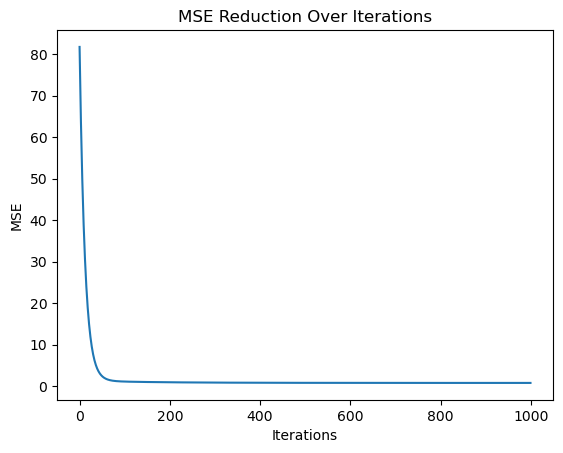

In [26]:
plt.plot(history)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Reduction Over Iterations')
plt.show()

## 6. Visualize Final Improved Fit

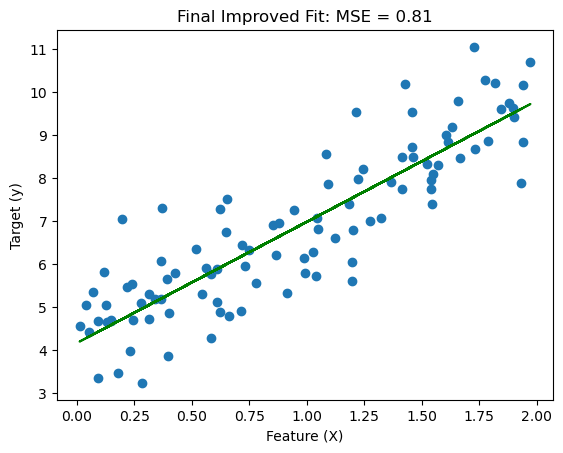

In [27]:
final_mse = compute_mse(X, y, w, b)

plt.scatter(X, y)
plt.plot(X, w * X + b, color='green')
plt.title(f'Final Improved Fit: MSE = {final_mse:.2f}')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.show()